In [98]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
%matplotlib inline
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
np.random_seed(10)

In [16]:
# import tarin val labels
df_train_val = pd.read_csv('./charts/train_val.csv')

In [17]:
df_train_val[df_train_val['image_index'] == 2]['type'].values[0]

'vbar_categorical'

In [67]:
def get_dataset(data_dir):
    # load training dataset in numpy array
    data = []
    labels = []
    ids = []
    for file_name in os.listdir(data_dir):
        # Load the images and resize them to (128, 128) to RGB
        img = cv2.imread(os.path.join(data_dir, file_name))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        imgs = np.array(img)
        id = file_name.split('.')[0]    
        
        ids.append(id)
        # Append the array to the list of images
        data.append(imgs)
        label = df_train_val[df_train_val['image_index'] == int(id)]['type'].values[0]
        labels.append(label)
        
    # Convert the string labels to numerical labels
    le = LabelEncoder()
    labels_trns = le.fit_transform(labels)
    return np.array(data), np.array(labels_trns), np.array(labels), np.array(ids)

In [68]:
X_train, y_train, labels, index = get_dataset('./charts/train_val')

In [46]:
X_train.shape, y_train.shape, labels.shape

((1000, 128, 128, 3), (1000,), (1000,))

In [69]:
charts_df = pd.DataFrame({'id':index,'charts_index':y_train, 'labels':labels})
charts_df.head(10)

,id,charts_index,labels
0,569,2,line
1,581,2,line
2,614,3,pie
3,71,4,vbar_categorical
4,701,3,pie
5,271,1,hbar_categorical
6,583,2,line
7,572,2,line
8,927,0,dot_line
9,900,0,dot_line


In [22]:
# Normalize
X_train = X_train / 255.0
#X_test = X_test / 255.0

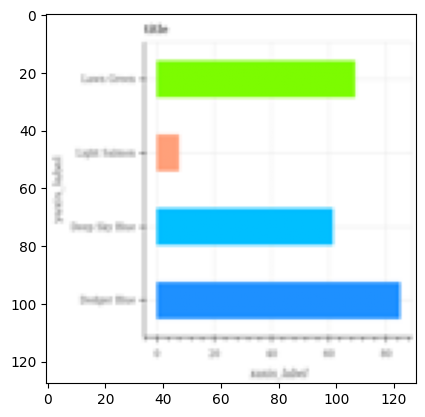

In [23]:
plt.imshow(X_train[5])

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state = 2)

In [25]:
X_train.shape, y_train.shape

((800, 128, 128, 3), (800,))

In [27]:
# Model
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape= (128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    Flatten(),
    Dense(500, activation='relu'),
    Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
25/25 [==============================] - 74s 3s/step - loss: 8.1640 - accuracy: 0.5725
Epoch 2/5
25/25 [==============================] - 71s 3s/step - loss: 0.2520 - accuracy: 0.8938
Epoch 3/5
25/25 [==============================] - 72s 3s/step - loss: 0.1206 - accuracy: 0.9588
Epoch 4/5
25/25 [==============================] - 71s 3s/step - loss: 0.0814 - accuracy: 0.9700
Epoch 5/5
25/25 [==============================] - 73s 3s/step - loss: 0.0219 - accuracy: 0.9962


In [28]:
model.save('cnn_charts_model')

In [29]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 3s 382ms/step - loss: 0.1161 - accuracy: 0.9650


[0.11605271697044373, 0.9649999737739563]

In [30]:
model = tf.keras.models.load_model('cnn_charts_model')

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)

7/7 [==============================] - 3s 374ms/step - loss: 0.1161 - accuracy: 0.9650


In [32]:
print(loss)
print(accuracy)

0.11605271697044373
0.9649999737739563


In [33]:
y_predict = model.predict(X_test)

7/7 [==============================] - 4s 637ms/step


In [34]:
y_predict[0]

array([2.3588546e-01, 7.8607863e-03, 7.5615555e-01, 2.8699520e-05,
       6.9569483e-05], dtype=float32)

In [35]:
np.argmax(y_predict[0]) # correct prediction

2

In [43]:
y_test[3]

0

For test label 3, predicted value is 3, chart is pie


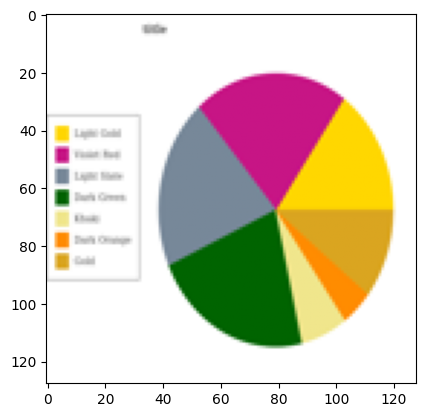

------------------------------------------------------------------------------------------
For test label 0, predicted value is 0, chart is dot_line


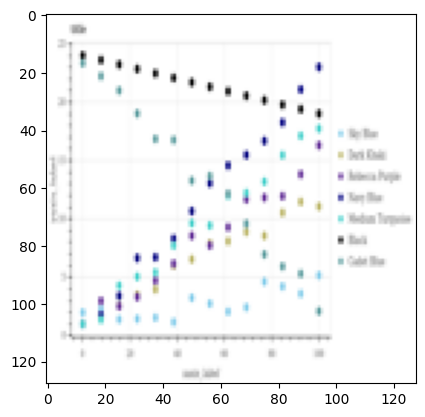

------------------------------------------------------------------------------------------
For test label 0, predicted value is 0, chart is dot_line


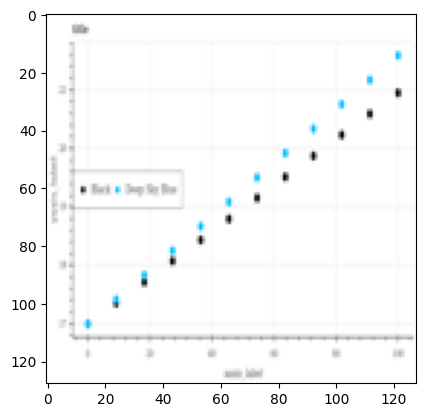

------------------------------------------------------------------------------------------
For test label 3, predicted value is 3, chart is pie


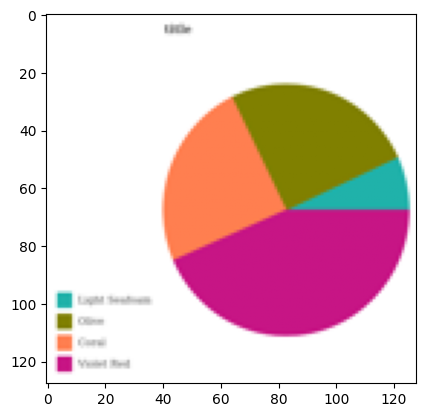

------------------------------------------------------------------------------------------
For test label 0, predicted value is 0, chart is dot_line


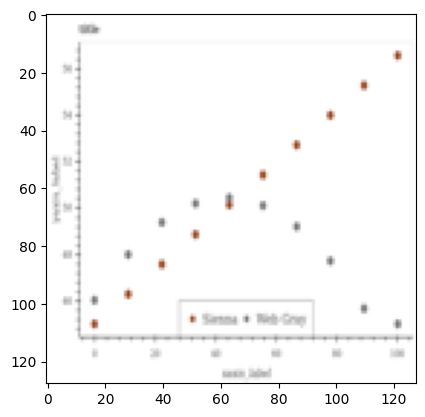

------------------------------------------------------------------------------------------
For test label 3, predicted value is 4, chart is vbar_categorical


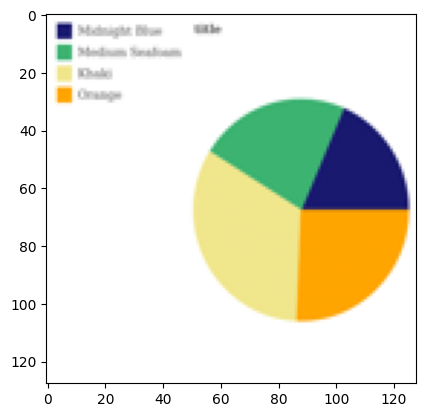

------------------------------------------------------------------------------------------
For test label 3, predicted value is 3, chart is pie


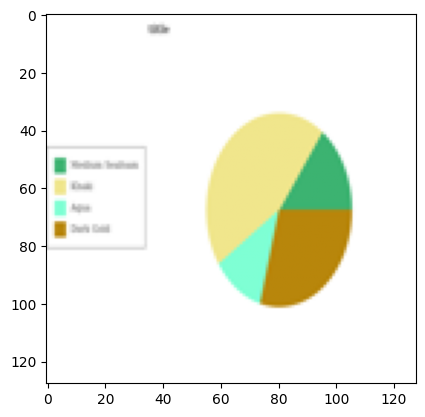

------------------------------------------------------------------------------------------
For test label 4, predicted value is 4, chart is vbar_categorical


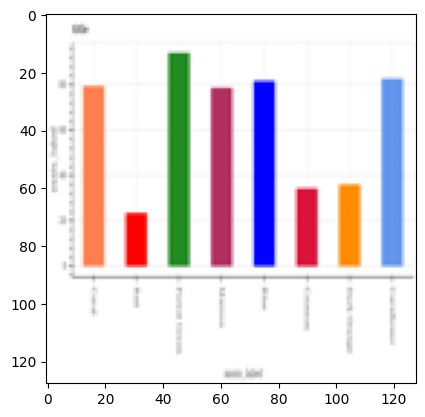

------------------------------------------------------------------------------------------
For test label 4, predicted value is 4, chart is vbar_categorical


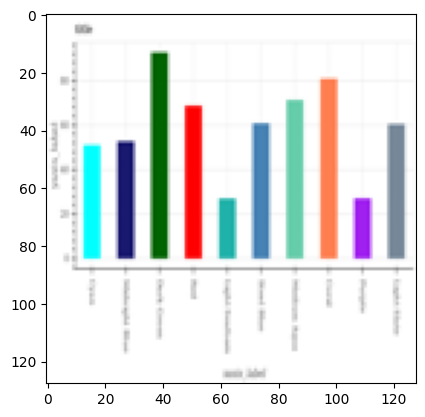

------------------------------------------------------------------------------------------
For test label 3, predicted value is 3, chart is pie


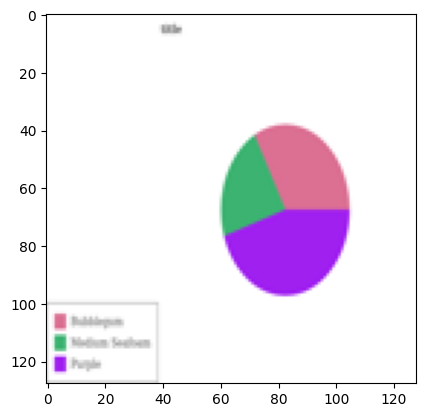

------------------------------------------------------------------------------------------


In [76]:
# lets predict some random images

for i in range(10):
    # Get a random index of the list
    random_index = random.randint(0, len(y_predict) - 1)
    predicted_val = np.argmax(y_predict[random_index])
    print(f"For test label {y_test[random_index]}, predicted value is {predicted_val}, chart is {charts_df[charts_df['charts_index'] == predicted_val]['labels'].values[0]}")
    img = X_test[random_index]
    plt.imshow(img)
    plt.show()
    print("--"*45)

In [37]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:6]

[2, 3, 3, 0, 2, 1]

In [38]:
y_test[:6]

array([2, 3, 3, 0, 2, 1])

In [39]:
# Confusion Matrix
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[42,  0,  0,  0,  0],
       [ 0, 41,  0,  1,  0],
       [ 4,  0, 38,  0,  0],
       [ 0,  0,  0, 45,  2],
       [ 0,  0,  0,  0, 27]], dtype=int32)>

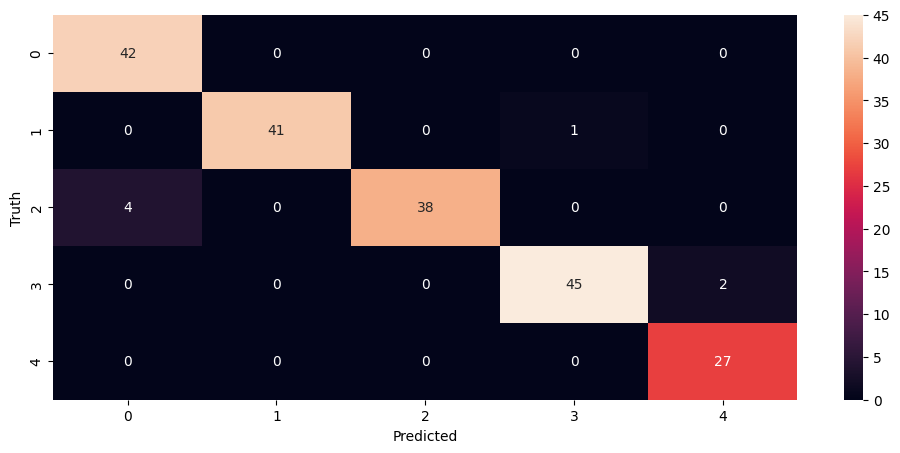

In [40]:
import seaborn as sn
plt.figure(figsize = (12,5))
sn.heatmap(conf_mat, annot = True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [92]:
X_train.shape, y_train.shape

((800, 128, 128, 3), (800,))

In [135]:
# Task 3

# Define the hyperparameters
batch_size = 32
epochs = 5
learning_rate = 0.0001
image_size = (128, 128)

In [100]:
# Create data generators with image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)


In [123]:
charts_df['filename'] =  charts_df['id'].apply(lambda x: x+'.png')

In [124]:
val_df = charts_df.iloc[:200]
train_df = charts_df.iloc[200:]
train_df.shape, val_df.shape

((800, 4), (200, 4))

In [125]:
train_df.head()

,id,charts_index,labels,filename
200,245,1,hbar_categorical,245.png
201,393,1,hbar_categorical,393.png
202,968,0,dot_line,968.png
203,612,3,pie,612.png
204,501,2,line,501.png


In [130]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    directory='./charts/train_val',
    y_col='labels',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory='./charts/train_val',
    x_col='filename',
    y_col='labels',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 800 validated image filenames belonging to 5 classes.
Found 200 validated image filenames belonging to 5 classes.


In [131]:
# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers in the pre-trained model
for layer in vgg16.layers:
    layer.trainable = False


In [132]:
# Add new fully-connected layers for our task
x = vgg16.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# Create the fine-tuned model
model = Model(inputs=vgg16.input, outputs=predictions)


In [136]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the fine-tuned model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)


Epoch 1/5
25/25 [==============================] - 206s 8s/step - loss: 0.9188 - accuracy: 0.7063 - val_loss: 0.2731 - val_accuracy: 0.9800
Epoch 2/5
25/25 [==============================] - 199s 8s/step - loss: 0.2974 - accuracy: 0.9550 - val_loss: 0.0691 - val_accuracy: 0.9950
Epoch 3/5
25/25 [==============================] - 201s 8s/step - loss: 0.1260 - accuracy: 0.9800 - val_loss: 0.0383 - val_accuracy: 0.9900
Epoch 4/5
25/25 [==============================] - 197s 8s/step - loss: 0.0874 - accuracy: 0.9837 - val_loss: 0.0282 - val_accuracy: 0.9900
Epoch 5/5
25/25 [==============================] - 203s 8s/step - loss: 0.0720 - accuracy: 0.9825 - val_loss: 0.0206 - val_accuracy: 0.9900


In [137]:

# Evaluate the performance on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)

7/7 [==============================] - 40s 6s/step - loss: 0.0206 - accuracy: 0.9900
Validation loss: 0.020579621195793152
Validation accuracy: 0.9900000095367432
